In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math

df = pd.read_csv('q2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.set_index(['Country'],inplace=True)
df.sort_index(inplace=True)

In [2]:
df

,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,primary commodity export dependence,...,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,Cities,avg_latitude,avg_longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Yes,LIC,"19,37","7,2","1,99","0,0","32,3","10,0","11,6","1,5",...,"12,19","0,0","0,62","0,2","2,4","2,0","0,4","{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos...",34.046741,67.266813
Albania,No,MIC,"1,20","0,0","9,68","2,3","13,5","5,4","3,7","0,5",...,"6,37","0,0","7,97","3,2","3,4","4,0","3,7","{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""...",41.088976,20.014610
Algeria,No,MIC,"0,11","0,0","1,07","0,0","20,2","8,1","94,7","10,0",...,x,x,"0,87","0,3","3,5","4,8","4,0","{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat...",35.602693,3.235778
Angola,Yes,MIC,"0,19","0,0","0,00","0,0","19,8","7,9","98,6","10,0",...,"5,41","1,2","-5,42","0,0","3,8","5,0","4,4","{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati...",-10.394025,16.401273
Antigua and Barbuda,No,HIC,"0,69","0,0","2,16","0,0","27,8","10,0","0,3","0,0",...,"3,21","5,6","8,39","3,4","4,7","5,7","4,9","{""Country"":""Antigua and Barbuda"",""City"":""Aberd...",17.085519,-61.791439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Yes,MIC,No data,x,"0,03","0,0",x,x,"88,0","10,0",...,x,x,x,x,"4,3","4,3","4,3","{""Country"":""Venezuela"",""City"":""1 Beneficio"",""L...",9.326775,-67.788678
Vietnam,No,MIC,"1,12","0,0","6,51","0,8","8,0","3,2","3,1","0,4",...,"2,53","6,9","6,32","2,5","2,7","3,2","3,2","{""Country"":""Vietnam"",""City"":""A\u00e0m T\u00e2m...",17.427567,106.246390
Yemen,Yes,LIC,"10,37","2,7","12,45","3,7","46,9","10,0","0,5","0,1",...,x,x,"-1,05","0,0","3,3","4,1","2,6","{""Country"":""Yemen"",""City"":""Abadila"",""Latitude""...",14.588661,45.226203


In [3]:
list(df)

['GHRP',
 'Income classification according to WB',
 'Net_ODA_received_perc_of_GNI',
 'Aid dependence',
 'Volume of remittances in USD as a proportion of total GDP percent 2014-18',
 'Remittances',
 'Food imports percent of total merchandise exports',
 'food import dependence ',
 'Fuels ores and metals exports percent of total merchandise exports',
 'primary commodity export dependence',
 'tourism as percentage of GDP',
 'tourism dependence',
 'General government gross debt Percent of GDP 2019',
 'Government indeptedness',
 'Total reserves in months of imports 2018',
 'Foreign currency reserves',
 'Foreign direct investment, net inflows percent of GDP',
 'Foreign direct investment',
 'Covid_19_Economic_exposure_index',
 'Covid_19_Economic_exposure_index_Ex_aid_and_FDI',
 'Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import',
 'Cities',
 'avg_latitude',
 'avg_longitude']

In [6]:
selected_columns = df[["Cities"]]
df_cities=selected_columns.copy()

In [7]:
df_cities

,Cities
Country,
Afghanistan,"{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos..."
Albania,"{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""..."
Algeria,"{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat..."
Angola,"{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati..."
Antigua and Barbuda,"{""Country"":""Antigua and Barbuda"",""City"":""Aberd..."
...,...
Venezuela,"{""Country"":""Venezuela"",""City"":""1 Beneficio"",""L..."
Vietnam,"{""Country"":""Vietnam"",""City"":""A\u00e0m T\u00e2m..."
Yemen,"{""Country"":""Yemen"",""City"":""Abadila"",""Latitude""..."


In [14]:
df_cities.reset_index(inplace=True)
df_info = df_cities.copy()
df_info["Population"] = np.nan
i = 0
while i< df_info.shape[0]:
    city_list = []
    population_list = []
    json_string = df_info.iloc[i]['Cities'].split("|||")
    for token in json_string:
        a_json = json.loads(token)
        if a_json['Population'] != None:
            population_list.append(str(a_json['Population']))
    df_info["Population"][i] = population_list
    i +=1

<ipython-input-14-7b5d445831e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info["Population"][i] = population_list


In [16]:
df_info.drop(columns=["index", "Cities"], axis=1, inplace=True)

In [17]:
df_info

,Country,Population
0,Afghanistan,"[15098.0, 10023.0, 27034.0, 48400.0, 15708.0, ..."
1,Albania,"[7967.0, 10361.0, 47606.0, 7114.0, 11212.0, 15..."
2,Algeria,"[89441.0, 84998.0, 1980242.0, 51460.0, 450126...."
3,Angola,"[151235.0, 21205.0, 66020.0, 10551.0, 30305.0,..."
4,Antigua and Barbuda,"[2526.0, 831.0, 682.0, 623.0, 1668.0, 623.0, 9..."
...,...,...
184,Venezuela,"[143739.0, 40058.0, 117605.0, 73074.0, 30869.0..."
185,Vietnam,"[21837.0, 53732.0, 107920.0, 43564.0, 59449.0,..."
186,Yemen,"[550744.0, 48217.0, 234992.0, 9627.0, 23377.0,..."
187,Zambia,"[3690.0, 4061.0, 11073.0, 4477.0, 57335.0, 148..."


In [18]:
df6 = df_info.set_index(['Country']).apply(pd.Series.explode).reset_index()
df6["Population"] = pd.to_numeric(df6["Population"])

In [19]:
df6

,Country,Population
0,Afghanistan,15098.0
1,Afghanistan,10023.0
2,Afghanistan,27034.0
3,Afghanistan,48400.0
4,Afghanistan,15708.0
...,...,...
47514,Zimbabwe,38231.0
47515,Zimbabwe,23761.0
47516,Zimbabwe,17107.0
47517,Zimbabwe,36702.0


In [26]:
df_country_population = df6.groupby(["Country"])["Population"].agg('sum').reset_index()

In [27]:
df_country_population

,Country,Population
0,Afghanistan,5651790.0
1,Albania,1508244.0
2,Algeria,3757616.0
3,Angola,4315181.0
4,Antigua and Barbuda,8649.0
...,...,...
184,Venezuela,16835784.0
185,Vietnam,13256370.0
186,Yemen,1021997.0
187,Zambia,3903055.0


In [33]:
df_country_population.loc[25, 'Country'] = 'Burkina'
df_country_population.loc[41, 'Country'] = 'CZ'
df_country_population.loc[42, 'Country'] = 'Congo'
df_country_population.loc[114, 'Country'] = 'Burma (Myanmar)'
df_country_population.loc[123, 'Country'] = 'Korea, North'
df_country_population.loc[128, 'Country'] = 'East Timor'
df_country_population.loc[137, 'Country'] = 'Congo'
df_country_population.loc[139, 'Country'] = 'Russian Federation'
df_country_population.loc[157, 'Country'] = 'Korea, South'
df_country_population.loc[180, 'Country'] = 'US'

In [34]:
df_continets=pd.read_csv("Countries-Continents.csv")

In [36]:
df_merged = pd.merge(left=df_country_population, right=df_continets, on=None, left_on='Country', right_on='Country')

In [37]:
df_merged

,Country,Population,Continent
0,Afghanistan,5651790.0,Asia
1,Albania,1508244.0,Europe
2,Algeria,3757616.0,Africa
3,Angola,4315181.0,Africa
4,Antigua and Barbuda,8649.0,North America
...,...,...,...
184,Venezuela,16835784.0,South America
185,Vietnam,13256370.0,Asia
186,Yemen,1021997.0,Asia
187,Zambia,3903055.0,Africa


In [38]:
world_total_population = df_merged["Population"].sum()

In [39]:
world_total_population

2270484027.0

In [40]:
df_south_america = df_merged[df_merged["Continent"]=="South America"]

In [41]:
df_south_america

,Country,Population,Continent
5,Argentina,15416375.0,South America
19,Bolivia,3569569.0,South America
22,Brazil,133449921.0,South America
33,Chile,11618910.0,South America
35,Colombia,32869538.0,South America
48,Ecuador,7174927.0,South America
68,Guyana,351002.0,South America
132,Paraguay,2833416.0,South America
133,Peru,17845253.0,South America
161,Suriname,292145.0,South America


In [42]:
df_south_america["population_percentage"] = df_south_america["Population"].apply(lambda x: x/world_total_population)

<ipython-input-42-a23d4f1abfc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south_america["population_percentage"] = df_south_america["Population"].apply(lambda x: x/world_total_population)


In [43]:
df_south_america

,Country,Population,Continent,population_percentage
5,Argentina,15416375.0,South America,0.006790
19,Bolivia,3569569.0,South America,0.001572
22,Brazil,133449921.0,South America,0.058776
33,Chile,11618910.0,South America,0.005117
35,Colombia,32869538.0,South America,0.014477
48,Ecuador,7174927.0,South America,0.003160
68,Guyana,351002.0,South America,0.000155
132,Paraguay,2833416.0,South America,0.001248
133,Peru,17845253.0,South America,0.007860
161,Suriname,292145.0,South America,0.000129


In [46]:
df_plot = df_south_america[["Country", "population_percentage"]]

In [47]:
df_plot

,Country,population_percentage
5,Argentina,0.006790
19,Bolivia,0.001572
22,Brazil,0.058776
33,Chile,0.005117
35,Colombia,0.014477
48,Ecuador,0.003160
68,Guyana,0.000155
132,Paraguay,0.001248
133,Peru,0.007860
161,Suriname,0.000129


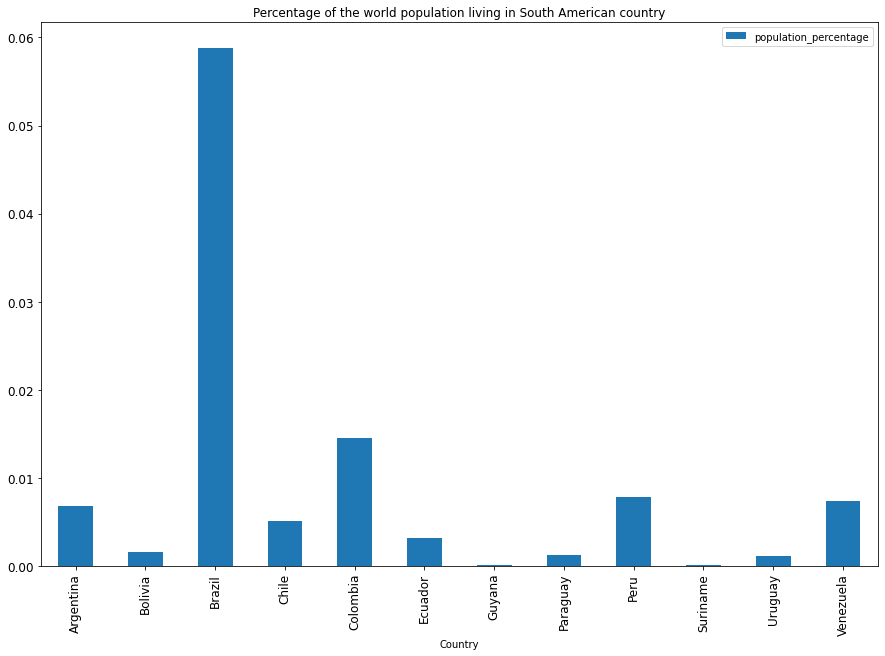

In [56]:
df_plot.set_index("Country", inplace=True)
ax = df_plot.plot(kind='bar', title ="Percentage of the world population living in South American country", figsize=(15, 10), legend=True, fontsize=12)

In [57]:
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<AxesSubplot:title={'center':'Percentage of the world population living in South American country'}, xlabel='Country'>

In [55]:
ax

<AxesSubplot:title={'center':'Percentage of the world population living in South American country'}, xlabel='Country', ylabel='population_percentage'>

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math

df2 = pd.read_csv('q2.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.set_index(['Country'],inplace=True)
df2.sort_index(inplace=True)

selected_columns = df2[["Cities"]]
df_cities=selected_columns.copy()
df_cities.reset_index(inplace=True)
df_info = df_cities.copy()
df_info["Population"] = np.nan
i = 0
while i< df_info.shape[0]:
    city_list = []
    population_list = []
    json_string = df_info.iloc[i]['Cities'].split("|||")
    for token in json_string:
        a_json = json.loads(token)
        if a_json['Population'] != None:
            population_list.append(str(a_json['Population']))
    df_info["Population"][i] = population_list
    i +=1
df_info.drop(columns=["Cities"], axis=1, inplace=True)
df6 = df_info.set_index(['Country']).apply(pd.Series.explode).reset_index()
df6["Population"] = pd.to_numeric(df6["Population"])

df_country_population = df6.groupby(["Country"])["Population"].agg('sum').reset_index()
df_country_population.loc[25, 'Country'] = 'Burkina'
df_country_population.loc[41, 'Country'] = 'CZ'
df_country_population.loc[42, 'Country'] = 'Congo'
df_country_population.loc[114, 'Country'] = 'Burma (Myanmar)'
df_country_population.loc[123, 'Country'] = 'Korea, North'
df_country_population.loc[128, 'Country'] = 'East Timor'
df_country_population.loc[137, 'Country'] = 'Congo'
df_country_population.loc[139, 'Country'] = 'Russian Federation'
df_country_population.loc[157, 'Country'] = 'Korea, South'
df_country_population.loc[180, 'Country'] = 'US'
df_continets=pd.read_csv("Countries-Continents.csv")
df_merged = pd.merge(left=df_country_population, right=df_continets, on=None, left_on='Country', right_on='Country')
world_total_population = df_merged["Population"].sum()
df_south_america = df_merged[df_merged["Continent"]=="South America"]
df_south_america["population_percentage"] = df_south_america["Population"].apply(lambda x: x/world_total_population)
df_plot = df_south_america[["Country", "population_percentage"]]
# df_plot.set_index("Country", inplace=True)
# ax = df_plot.plot(kind='bar', title ="Percentage of the world population living in South American country", figsize=(15, 10), legend=True, fontsize=12)




<ipython-input-1-972a668bbe6c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info["Population"][i] = population_list
/Applications/anaconda3/envs/COMP9321/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-1-972a668bbe6c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [2]:
df_plot

,Country,population_percentage
5,Argentina,0.006790
19,Bolivia,0.001572
22,Brazil,0.058776
33,Chile,0.005117
35,Colombia,0.014477
48,Ecuador,0.003160
68,Guyana,0.000155
132,Paraguay,0.001248
133,Peru,0.007860
161,Suriname,0.000129


In [3]:
df_res = df_plot.copy()
df_res["Population percentage in the world"] = df_res["population_percentage"].apply(lambda x: round(x*100, 2))
df_res.drop("population_percentage", axis=1, inplace=True)
# ax = df_plot.plot(kind='bar', title ="Percentage of the world population living in South American country", figsize=(15, 10), legend=True, fontsize=12)

In [4]:
df_res

,Country,Population percentage in the world
5,Argentina,0.68
19,Bolivia,0.16
22,Brazil,5.88
33,Chile,0.51
35,Colombia,1.45
48,Ecuador,0.32
68,Guyana,0.02
132,Paraguay,0.12
133,Peru,0.79
161,Suriname,0.01


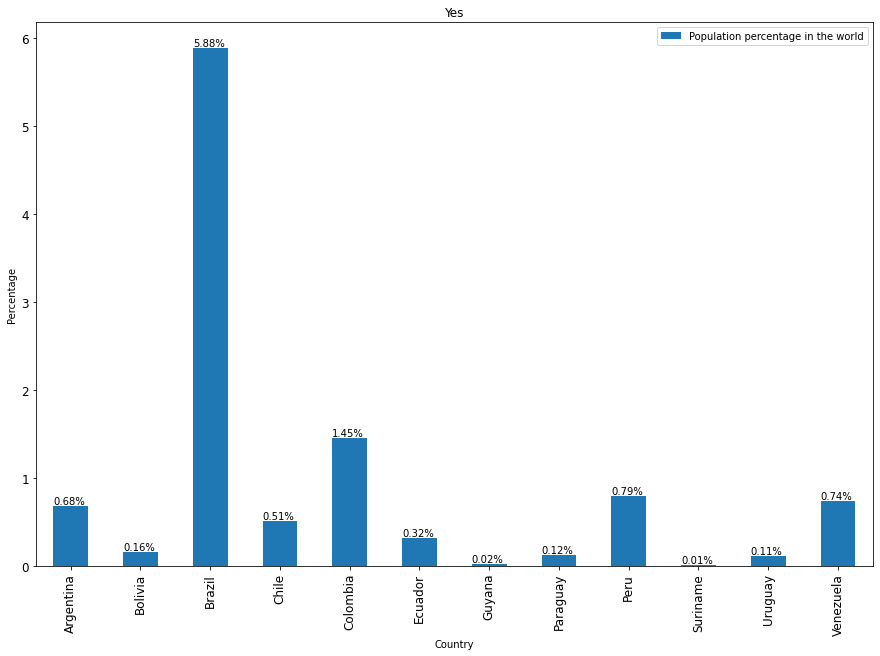

In [9]:
ax = df_res.plot.bar(x='Country', y='Population percentage in the world', ylabel='Percentage', title='Yes', legend=True)
xlocs=[i for i in range(0,12)]
for i, v in enumerate(df_res['Population percentage in the world']):
    ax.text(xlocs[i]-0.25, v+0.02, str(v)+'%')

    
plt.gcf().set_size_inches(15,10)
    

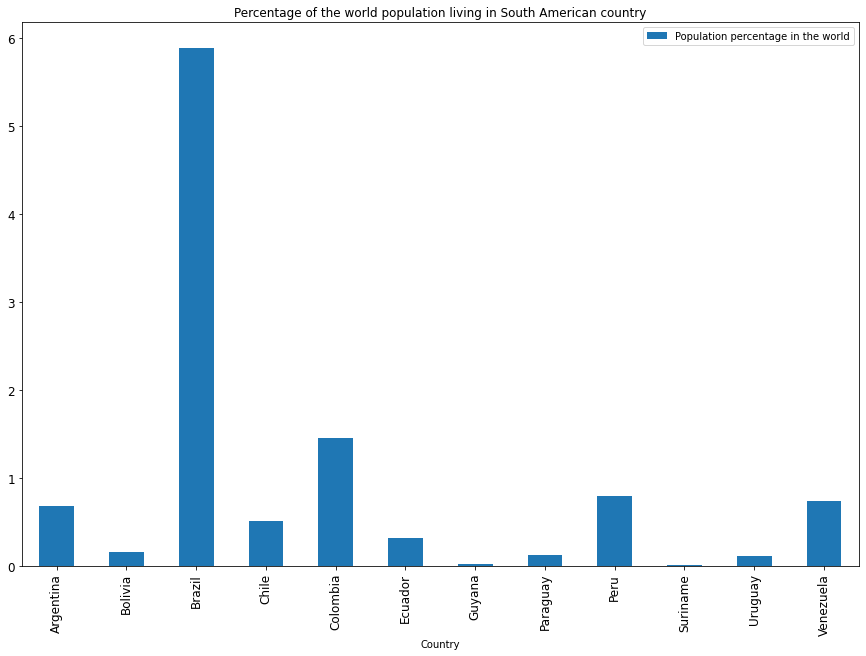

In [14]:
ax = df_res.plot(kind='bar', title ="Percentage of the world population living in South American country", figsize=(15, 10), legend=True, fontsize=12)

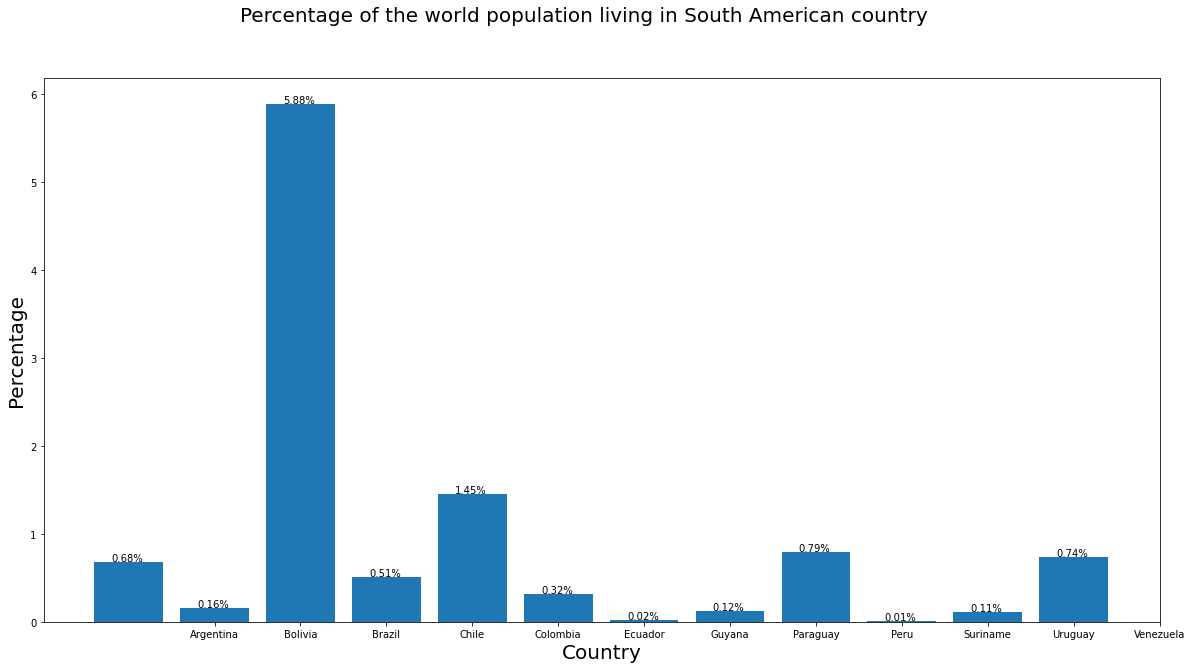

In [71]:
plt.subplots(figsize=(20, 10))
plt.suptitle('Percentage of the world population living in South American country', fontsize=20)
x=[i for i in df_res.index]
y=[i for i in df_res["Population percentage in the world"]]

plt.bar(x, height= y)
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,12)]
xlabs=[i for i in x]
plt.xlabel('Country', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.xticks(xlocs, xlabs)
for i, v in enumerate(y):
    plt.text(xlocs[i] - 1.2, v + 0.01, str(v)+"%")


plt.show()

In [27]:
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'